<b>Aktywność 10</b><br>
Niezbędne biblioteki: contextily, geoai, openpyxl, scikit-learn, seaborn, srai

<b>Ćwiczenie 1.</b> Zainstaluj pakiet geoai-py

In [1]:
%pip install geoai-py

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<b>Ćwiczenie 2.</b> Zaimportuj bibliotekę geoai

In [2]:
import geoai

<b>Ćwiczenie 3.</b> Pobierz przykładowy plik rastrowy z panelami slonecznymi (https://huggingface.co/datasets/giswqs/geospatial/resolve/main/solar_panels_davis_ca.tif)

In [3]:
raster_url = 'https://huggingface.co/datasets/giswqs/geospatial/resolve/main/solar_panels_davis_ca.tif'

In [4]:
raster_path = geoai.download_file(raster_url)

<b>Ćwiczenie 4.</b> Zaprezentuj informacje o rastrach z pobranego pliku.

===== RASTER INFORMATION: solar_panels_davis_ca.tif =====
Driver: GTiff
Dimensions: 6711 x 3242 pixels
Number of bands: 3
Data type: uint8
Coordinate Reference System: LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Georeferenced Bounds: BoundingBox(left=-13556075.706688922, bottom=4657729.5446374295, right=-13555574.76898035, top=4657971.533802349)
Pixel Resolution: 0.07464427187774597, 0.07464193859333511
NoData Value: None

----- Band Statistics -----
Band 1:
  Min: 0.00
  Max: 255.00
  Mean: 104.00
  Std Dev: 64.62
Band 2:
  Min: 0.00
  Max: 255.00
  Mean: 102.47
  Std Dev: 58.59
Band 3:
  Min: 0.00
  Max: 255.00
  Mean: 112.06
  Std Dev: 46.38


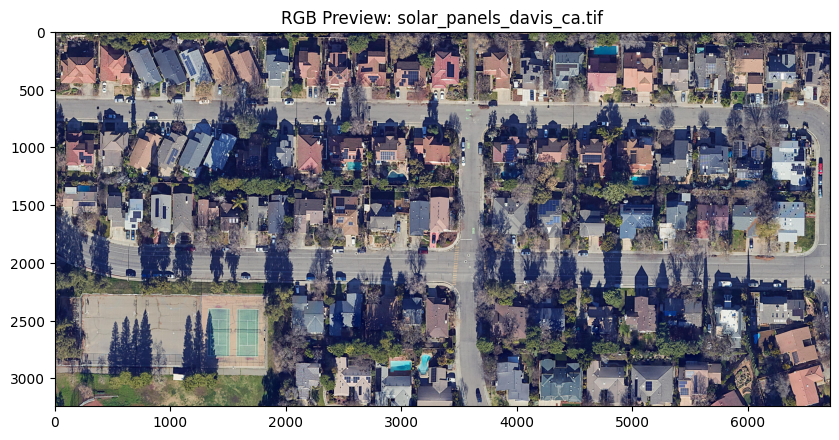

In [5]:
geoai.print_raster_info(raster_path)

<b>Ćwiczenie 5.</b> Zwizualizuj przykładowe dane.

In [6]:
geoai.view_raster(raster_url)

<b>Ćwiczenie 6.</b> Zainicjalizuj model do detekcji paneli słonecznych.

In [7]:
detector = geoai.SolarPanelDetector()

Model path not specified, downloading from Hugging Face...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


solar_panel_detection.pth:   0%|          | 0.00/176M [00:00<?, ?B/s]

Model downloaded to: C:\Users\rtome\.cache\huggingface\hub\models--giswqs--geoai\snapshots\089548329c81f128fa12576663e7abdedb5cfa0e\solar_panel_detection.pth
Model loaded successfully


<b>Ćwiczenie 7.</b> Wygeneruj maskę panelii i zapisz ja do pliku **solar_panel_masks.tif**. Ustaw próg ufności na 0.4, próg maski na 0.5, minimalny rozmair obiektu na 100, nachodzenie wycinków na 0.25, rozmiar wycinka: 400x400 i rozmiar paczki na 4.

In [8]:
output_path = 'solar_panel_masks.tif'

In [9]:
masks_path = detector.generate_masks(
    raster_path = raster_path,
    output_path = output_path,
    confidence_threshold = 0.4,
    mask_threshold = 0.5,
    min_object_area = 100,
    overlap = 0.25,
    chip_size = (400, 400),
    batch_size = 4,
    verbose = False
)

Dataset initialized with 11 rows and 23 columns of chips
Image dimensions: 6711 x 3242 pixels
Chip size: 400 x 400 pixels
Overlap: 25.0% (stride_x=300, stride_y=300)
CRS: LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Processing raster with 64 batches


100%|██████████| 64/64 [07:48<00:00,  7.33s/it]


Masks with confidence values saved to solar_panel_masks.tif


<b>Ćwiczenie 8.</b> Nałóż maskę paneli słonecznych na mapę, zastosuj kolorystykę 'autumn' oraz nazwij maskę jako 'Solar Panels'.

In [10]:
geoai.view_raster(
    source = output_path,
    indexes = [2],
    colormap = 'autumn',
    layer_name = 'Solar Panels',
    basemap = raster_url
)

ImportError: localtileserver is not installed. Please install it before proceeding. https://github.com/banesullivan/localtileserver

<b>Ćwiczenie 9.</b> Uprość kształty wykrytych obiektów (za pomocą orthogonalize). Przekształć je do formatu GeoJSON i zapisz wynik do pliku **solar_panel_masks.geojson**

In [ ]:
gdf = geoai.orthogonalize(
    input_path = masks_path,
    output_path = 'solar_panel_masks.geojson',
    epsilon = 0.2
)

Processing 82 features...


Converting features: 100%|██████████| 82/82 [00:01<00:00, 42.75shape/s] 


Saving to solar_panel_masks.geojson...
Done!


<b>Ćwiczenie 10.</b> Wyświetl wektory na mapie interaktywnej.

In [ ]:
geoai.view_vector_interactive(
    vector_data = gdf,
    tiles = raster_url
)

<b>Ćwiczenie 11.</b> Dodaj dane geometryczne znalezionych paneli slonecznych. Sprawdź rozmiar tablicy. Wyświetl pierwsze wartości w tabeli.

In [ ]:
gdf = geoai.add_geometric_properties(gdf)

In [ ]:
gdf.shape

(81, 16)

In [ ]:
gdf.head()

,geometry,value,area_m2,length_m,perimeter_m,area_bbox_m2,area_convex_m2,area_filled_m2,major_length_m,minor_length_m,eccentricity,orientation,elongation,extent,solidity,complexity
0,"POLYGON ((-13555603.955 4657949.439, -13555601...",255,13.848780,17.773420,17.773420,13.848780,13.848780,13.848780,6.871240,2.015470,0.956014,90.0,3.409249,1.000000,1.000000,1.347288
1,"POLYGON ((-13555896.001 4657949.363, -13555894...",255,10.052594,17.996987,17.996987,10.052594,10.052594,10.052594,7.691523,1.306970,0.985457,90.0,5.885002,1.000000,1.000000,1.601238
2,"POLYGON ((-13555892.828 4657948.816, -13555889...",255,43.794885,27.056748,27.056748,44.195465,43.995175,43.794885,8.012690,5.515684,0.725361,90.0,1.452710,0.990936,0.995447,1.153344
3,"POLYGON ((-13555589.94 4657947.647, -13555588....",255,44.195802,32.478562,32.478562,51.516271,48.477006,44.195802,9.257522,5.564802,0.799165,90.0,1.663585,0.857900,0.911686,1.378165
4,"POLYGON ((-13555760.559 4657949.141, -13555760...",255,9.995438,14.032941,14.032941,11.432909,10.627814,9.995438,4.030791,2.836394,0.710515,0.0,1.421097,0.874269,0.940498,1.252111


<b>Ćwiczenie 12.</b> Pokaż mapę z naniesionymi wykrytymi panelami slonecznymi. Pokoloruj je względem ich wydłużenia.

In [ ]:
geoai.view_vector_interactive(
    vector_data = gdf,
    column = 'elongation',
    tiles = raster_url
)

<b>Ćwiczenie 13.</b> Przefiltruj wykryte panele sloneczne tak aby miały conajmniej 5m^2 powierzchni oraz miały wartość wydłużenia mniejszą od 10. Sprawdź liczbę pozostałych paneli po przefiltrowaniu.

In [ ]:
gdf_filter = gdf[(gdf['elongation'] < 10) & (gdf['area_m2'] > 5)]

In [ ]:
len(gdf_filter)

70

<b>Ćwiczenie 14.</b> Zwizualizuj przefiltrowane panele sloneczne, kolorując je względem ich powierzchni.

In [ ]:
geoai.view_vector_interactive(
    gdf_filter,
    column = 'area_m2',
    tiles = raster_url
)

<b>Ćwiczenie 15.</b> Pokaż na mapie czerwone obrysy wykrytych i przefiltrowanych paneli słonecznych.

In [ ]:
geoai.view_vector_interactive(
    vector_data = gdf_filter,
    style_kwds = {'color': 'red', 'fillOpacity': 0},
    tiles = raster_url
)

<b>Ćwiczenie 16.</b> Przeanalizuj powierzchnię wykrytych i przefiltrowanych paneli słonecznych. Utwórz histogram rozkładu ich powierzchni. Podaj ich łączną powierzchnię.

In [ ]:
gdf_filter['area_m2'].describe()

,area_m2
count,70.000000
mean,25.090257
std,16.236111
min,5.070150
25%,13.155055
50%,22.587623
75%,32.609032
max,79.352841


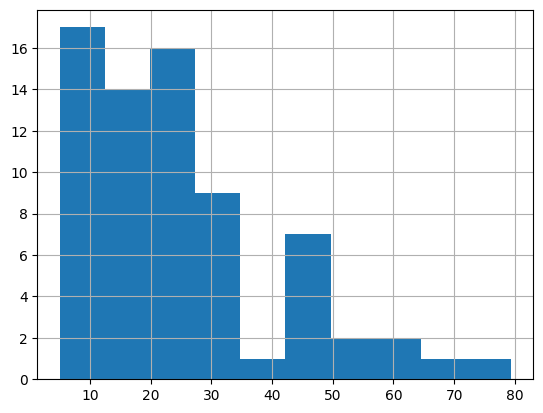

In [ ]:
gdf_filter['area_m2'].hist();

In [ ]:
print(gdf_filter['area_m2'].sum())

1756.3179861086749


<b>Ćwiczenie 17.</b> Zapisz wykryte i przefiltrowane panele słoneczne do pliku **solar_panels.geojson**

In [ ]:
gdf_filter.to_file('solar_panels.geojson')